In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split

from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #choose whether to use gpu or cpu

In [4]:

first_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\first_tenth'
second_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\second_tenth'
third_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\third_tenth'
fourth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\fourth_tenth'
fifth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\fifth_tenth'
sixth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\sixth_tenth'
seven_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\seventh_tenth'
eight_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\eighth_tenth'
ninth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\ninth_tenth'
tenth_dir = r'C:\Users\Public\PartIIB project 2023_2024\Image collection without reaction\00AgNO3_mole_fraction\6ClassHelical_1\last_tenth'



In [5]:
# multi-input dataset
class CustomImageDataset(Dataset):
    def __init__(self, first_dir, second_dir, third_dir, fourth_dir, fifth_dir, sixth_dir, seven_dir, eight_dir, ninth_dir, tenth_dir, transform=None):
        self.first_dir = first_dir
        self.second_dir = second_dir
        self.third_dir = third_dir
        self.fourth_dir = fourth_dir
        self.fifth_dir = fifth_dir
        self.sixth_dir = sixth_dir
        self.seven_dir = seven_dir
        self.eight_dir = eight_dir
        self.ninth_dir = ninth_dir
        self.tenth_dir = tenth_dir
        self.transform = transform
        # self.images1 = sorted(os.listdir(first_dir))
        self.images1 = sorted(os.listdir(first_dir), key=self.custom_sort_key)
        self.images2 = sorted(os.listdir(second_dir), key=self.custom_sort_key)
        self.images3 = sorted(os.listdir(third_dir), key=self.custom_sort_key)
        self.images4 = sorted(os.listdir(fourth_dir), key=self.custom_sort_key)
        self.images5 = sorted(os.listdir(fifth_dir), key=self.custom_sort_key)
        self.images6 = sorted(os.listdir(sixth_dir), key=self.custom_sort_key)
        self.images7 = sorted(os.listdir(seven_dir), key=self.custom_sort_key)
        self.images8 = sorted(os.listdir(eight_dir), key=self.custom_sort_key)
        self.images9 = sorted(os.listdir(ninth_dir), key=self.custom_sort_key)
        self.images10 = sorted(os.listdir(tenth_dir), key=self.custom_sort_key)

        self.labels10 = [self.extract_label(img) for img in self.images10]
        self.cuttime = [self.extract_cuttime(img) for img in self.images10]
        
        #input verification
        assert len(self.images1) == len(self.images2) == len(self.images3) == len(self.images4) == len(self.images5)

        self.length = len(self.images1)

    def __len__(self):
        return self.length
        # return len(self.images1)

    def __getitem__(self, idx):
        img_name1 = os.path.join(self.first_dir, self.images1[idx])
        image1 = Image.open(img_name1)
        img_name2 = os.path.join(self.second_dir, self.images2[idx])
        image2 = Image.open(img_name2)
        img_name3 = os.path.join(self.third_dir, self.images3[idx])
        image3 = Image.open(img_name3)
        img_name4 = os.path.join(self.fourth_dir, self.images4[idx])
        image4 = Image.open(img_name4)
        img_name5 = os.path.join(self.fifth_dir, self.images5[idx])
        image5 = Image.open(img_name5)
        img_name6 = os.path.join(self.sixth_dir, self.images6[idx])
        image6 = Image.open(img_name6)
        img_name7 = os.path.join(self.seven_dir, self.images7[idx])
        image7 = Image.open(img_name7)
        img_name8 = os.path.join(self.eight_dir, self.images8[idx])
        image8 = Image.open(img_name8)
        img_name9 = os.path.join(self.ninth_dir, self.images9[idx])
        image9 = Image.open(img_name9)
        img_name10 = os.path.join(self.tenth_dir, self.images10[idx])
        image10 = Image.open(img_name10)

    
        if self.transform:
            image1 = self.transform(image1)
            image2 = self.transform(image2)
            image3 = self.transform(image3)
            image4 = self.transform(image4)
            image5 = self.transform(image5)
            image6 = self.transform(image6)
            image7 = self.transform(image7)
            image8 = self.transform(image8)
            image9 = self.transform(image9)
            image10 = self.transform(image10)

        label10 = self.labels10[idx]
        cuttime = self.cuttime[idx]
        return image1, image2, image3, image4, image5, image6, image7, image8, image9, image10, label10, cuttime

    def custom_sort_key(self, item):
        # Extract numbers after 'Fig_' and 't-'
        fig_number = float(item.split('Fig_')[1].split('__')[0])
        t_number = float(item.split('t-')[1].split('_')[0])
        
        return fig_number, t_number
    
    def extract_label(self, img_name):
        # Assuming that the label is part of the filename before the first underscore
        # label = str(img_name)
        # print(label)

        label = float(img_name[-17:-5]) #this is the right code
        # print(label)

            
        return label
    
    def extract_cuttime(self, img_name):
        cuttime = float(img_name.split("t-")[1].split("_")[0])
        return cuttime

In [6]:
data_transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.45), (0.225))]) 

custom_dataset = CustomImageDataset(first_dir=first_dir, second_dir=second_dir, third_dir=third_dir, fourth_dir=fourth_dir, fifth_dir= fifth_dir, sixth_dir= sixth_dir, seven_dir=seven_dir, eight_dir= eight_dir, ninth_dir = ninth_dir, tenth_dir = tenth_dir, transform=data_transform)

# # Accessing the data
# for img, label in custom_dataset:
#     print(f"Image shape: {img.shape}, Label: {label}")

print(len(custom_dataset))

# train_set, val_set, test_set = random_split(custom_dataset, [int(len(custom_dataset)*0.75), int(len(custom_dataset)*0.15), int(len(custom_dataset)*0.100056)]) #splits data into training, validation and test sets
train_set, test_set = random_split(custom_dataset, [int(len(custom_dataset)*0.75), int(len(custom_dataset)*0.2504)])
print(len(train_set))
# print(len(val_set))
print(len(test_set))

500
375
125


In [8]:
#hyperparameters
num_epochs = 60
batch_size = 1
learning_rate = 0.0005


train = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test = DataLoader(test_set, batch_size=batch_size, shuffle=True)
for (images1, images2, images3, images4, images5, images6, images7, images8, images9, images10, labels10, cuttime) in train:
    print(images1, labels10.item(), cuttime.item())
    break

tensor([[[[-2., -2., -2.,  ..., -2., -2., -2.],
          [-2., -2., -2.,  ..., -2., -2., -2.],
          [-2., -2., -2.,  ..., -2., -2., -2.],
          ...,
          [-2., -2., -2.,  ..., -2., -2., -2.],
          [-2., -2., -2.,  ..., -2., -2., -2.],
          [-2., -2., -2.,  ..., -2., -2., -2.]]]]) 7.165452 198.0


In [17]:
class ConvNet(nn.Module): # note need to find out image size
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1,8,10, padding='same') #in_channels, out_channels, kernel_size
        self.normalise1 = nn.BatchNorm2d(8)
        # self.pool1 = nn.AvgPool2d(10, stride=10)
        self.pool1 = nn.AvgPool2d(10, stride=10)
        self.conv2 = nn.Conv2d(8, 16, 10, padding='same')
        self.normalise2 = nn.BatchNorm2d(16)
        # self.pool2 = nn.AvgPool2d(2, stride=2)
        self.pool2 = nn.AvgPool2d(2, stride=2)
        self.pool3 = nn.AvgPool2d(1, stride=1)
        self.conv3 = nn.Conv2d(16, 32, 10, padding='same')
        self.normalise3 = nn.BatchNorm2d(32) 
        self.conv4 = nn.Conv2d(32, 32, 10, padding='same')
        self.fc0 = nn.Linear(32*5*5, 400)

        self.convcomb1 = nn.Conv2d(1, 16, 20, padding='same')
        self.convcomb2 = nn.Conv2d(16, 32, 20, padding='same')
        
        self.fc1 = nn.Linear(6400+40, 3200)
        self.fc2 = nn.Linear(3200,1600)
        self.fc3 = nn.Linear(1600,800)
        self.fc4 = nn.Linear(800,200)
        self.fc5 = nn.Linear(200,50)
        self.fc6 = nn.Linear(50,1)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(1,1)


    def forward(self, x, y, z, a, b, c, d, e, f, g, t):
        x = self.pool1(F.relu(self.normalise1(self.conv1(x)))) 
        x = self.pool2(F.relu(self.normalise2(self.conv2(x)))) 
        x = self.pool3(F.relu(self.normalise3(self.conv3(x))))
        x = self.pool3(F.relu(self.normalise3(self.conv4(x))))
        x = torch.flatten(x)  #flatten
        # print(x.shape)
        x = self.fc0(x)

        y = self.pool1(F.relu(self.normalise1(self.conv1(y)))) 
        y = self.pool2(F.relu(self.normalise2(self.conv2(y)))) 
        y = self.pool3(F.relu(self.normalise3(self.conv3(y))))
        y = self.pool3(F.relu(self.normalise3(self.conv4(y))))
        y = torch.flatten(y)  #flatten
        # print(y.shape)
        y = self.fc0(y)

        z = self.pool1(F.relu(self.normalise1(self.conv1(z))))
        z = self.pool2(F.relu(self.normalise2(self.conv2(z)))) 
        z = self.pool3(F.relu(self.normalise3(self.conv3(z))))
        z = self.pool3(F.relu(self.normalise3(self.conv4(z))))
        z = torch.flatten(z)  #flatten
        z = self.fc0(z)

        a = self.pool1(F.relu(self.normalise1(self.conv1(a)))) 
        a = self.pool2(F.relu(self.normalise2(self.conv2(a))))
        a = self.pool3(F.relu(self.normalise3(self.conv3(a))))
        a = self.pool3(F.relu(self.normalise3(self.conv4(a))))
        a = torch.flatten(a) #flatten
        a = self.fc0(a)
        # print(a.shape)

        b = self.pool1(F.relu(self.normalise1(self.conv1(b))))
        b = self.pool2(F.relu(self.normalise2(self.conv2(b))))
        b = self.pool3(F.relu(self.normalise3(self.conv3(b))))
        b = self.pool3(F.relu(self.normalise3(self.conv4(b))))
        b = torch.flatten(b)  #flatten
        b = self.fc0(b)

        c = self.pool1(F.relu(self.normalise1(self.conv1(c))))
        c = self.pool2(F.relu(self.normalise2(self.conv2(c))))
        c = self.pool3(F.relu(self.normalise3(self.conv3(c))))
        c = self.pool3(F.relu(self.normalise3(self.conv4(c))))
        c = torch.flatten(c)  #flatten
        c = self.fc0(c)

        d = self.pool1(F.relu(self.normalise1(self.conv1(d))))
        d = self.pool2(F.relu(self.normalise2(self.conv2(d))))
        d = self.pool3(F.relu(self.normalise3(self.conv3(d))))
        d = self.pool3(F.relu(self.normalise3(self.conv4(d))))
        d = torch.flatten(d)  #flatten
        d = self.fc0(d)

        e = self.pool1(F.relu(self.normalise1(self.conv1(e))))
        e = self.pool2(F.relu(self.normalise2(self.conv2(e))))
        e = self.pool3(F.relu(self.normalise3(self.conv3(e))))
        e = self.pool3(F.relu(self.normalise3(self.conv4(e))))
        e = torch.flatten(e)  #flatten
        e = self.fc0(e)

        f = self.pool1(F.relu(self.normalise1(self.conv1(f))))
        f = self.pool2(F.relu(self.normalise2(self.conv2(f))))
        f = self.pool3(F.relu(self.normalise3(self.conv3(f))))
        f = self.pool3(F.relu(self.normalise3(self.conv4(f))))
        f = torch.flatten(f)  #flatten
        f = self.fc0(f)

        g = self.pool1(F.relu(self.normalise1(self.conv1(g))))
        g = self.pool2(F.relu(self.normalise2(self.conv2(g))))
        g = self.pool3(F.relu(self.normalise3(self.conv3(g))))
        g = self.pool3(F.relu(self.normalise3(self.conv4(g))))
        g = torch.flatten(g)  #flatten
        g = self.fc0(g)

        combined = torch.stack([x,y,z,a,b,c,d,e,f,g])
        combined = combined.unsqueeze(0)
        combined= combined.unsqueeze(0)
        # print(combined.shape)
        # print(combined)
        combined = self.pool2(F.relu(self.normalise2(self.convcomb1(combined)))) 
        # print(combined.shape)
        # print(combined)
        combined = self.pool2(F.relu(self.normalise3(self.convcomb2(combined)))) 
        # combined = combined.view(-1, 32*5*5)  #flatten
        combined = torch.flatten(combined)
        # print(combined.shape)
        t = self.fc(t)
        t = torch.flatten(t.repeat(1,40))
        # print(t.shape)
        # print(t)
        combined = torch.cat((combined, t), 0)
        # print(combined.shape)
        combined = F.relu(self.fc1(combined))
        combined = F.relu(self.fc2(combined))
        combined = F.relu(self.fc3(combined))
        combined = F.relu(self.fc4(combined))
        combined = F.relu(self.fc5(combined))
        combined = self.fc6(combined)
        return combined

In [18]:
model = ConvNet().to(device)

# loss and optimizer
criterion = nn.MSELoss()
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.001)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)
#training loop
n_total_steps = len(train)
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images1, images2, images3, images4, images5, images6, images7, images8, images9, images10, labels10, cuttimes) in enumerate(train):
        images1 = images1.to(device)
        images2 = images2.to(device)
        images3 = images3.to(device)    
        images4 = images4.to(device)
        images5 = images5.to(device)
        images6 = images6.to(device)
        images7 = images7.to(device)
        images8 = images8.to(device)
        images9 = images9.to(device)
        images10 = images10.to(device)
        labels10 = labels10.to(device)
        cuttimes = cuttimes.to(device).float()

        #forward
        outputs = model(images1, images2, images3, images4, images5, images6, images7, images8, images9, images10, cuttimes)
        # print(labels)
        labels10 = labels10.float()
        loss = criterion(outputs, labels10)

        #backward
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        # if (i+1) % 1000 ==0:
        # print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
        total_loss += loss.item()
    print(f'epoch {epoch+1}/{num_epochs}, average loss = {total_loss/len(train):.4f}')
            


epoch 1/60, average loss = 13.2112
epoch 2/60, average loss = 7.6119
epoch 3/60, average loss = 4.2733
epoch 4/60, average loss = 3.0759
epoch 5/60, average loss = 1.9174
epoch 6/60, average loss = 1.0096
epoch 7/60, average loss = 0.7989
epoch 8/60, average loss = 0.7473
epoch 9/60, average loss = 0.7611
epoch 10/60, average loss = 0.7441
epoch 11/60, average loss = 1.8623
epoch 12/60, average loss = 0.8623
epoch 13/60, average loss = 0.5744
epoch 14/60, average loss = 0.4533
epoch 15/60, average loss = 0.5725
epoch 16/60, average loss = 0.3888
epoch 17/60, average loss = 0.3203
epoch 18/60, average loss = 0.5548
epoch 19/60, average loss = 0.3468
epoch 20/60, average loss = 0.5827
epoch 21/60, average loss = 0.5195
epoch 22/60, average loss = 0.3286
epoch 23/60, average loss = 0.4054
epoch 24/60, average loss = 0.3150
epoch 25/60, average loss = 0.3667
epoch 26/60, average loss = 0.3320
epoch 27/60, average loss = 0.2150
epoch 28/60, average loss = 0.2771
epoch 29/60, average loss = 

RMSE = tensor([0.3283], dtype=torch.float64)
[7.791409969329834, 8.50526237487793, 7.890413761138916, 1.0260789394378662, 7.734189987182617, 7.949242115020752, 7.229309558868408, 1.0114187002182007, 11.161361694335938, 7.547796726226807, 10.332195281982422, 7.709889888763428, 1.0291762351989746, 5.101125240325928, 7.787538051605225, 10.380983352661133, 8.06358528137207, 9.08933162689209, 7.654449939727783, 6.239389896392822, 7.0510077476501465, 11.210063934326172, 8.083242416381836, 7.784063816070557, 7.822081565856934, 7.721770763397217, 7.95918607711792, 1.0141949653625488, 6.803090572357178, 7.5243353843688965, 7.804112911224365, 7.560814380645752, 7.876527309417725, 9.778505325317383, 9.496302604675293, 11.216270446777344, 1.1232352256774902, 5.795605182647705, 10.373113632202148, 11.344416618347168, 7.522310733795166, 7.719457149505615, 2.3002214431762695, 1.1191482543945312, 7.688986301422119, 1.1141753196716309, 5.055775165557861, 1.102942943572998, 11.29968547821045, 5.05013990

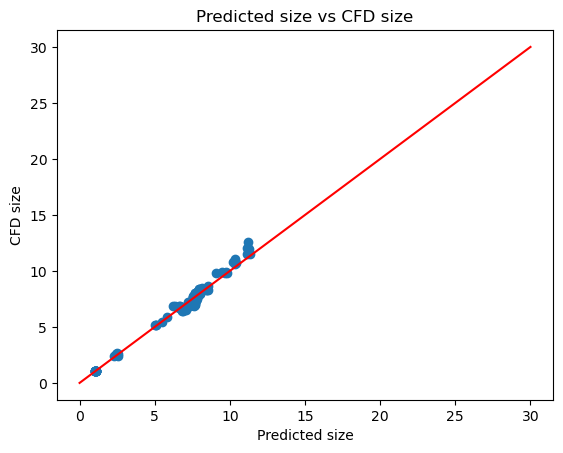

In [20]:
#Testing
with torch.no_grad(): # no need to calculate gradient
    squared_difference = 0
    predicted_size_data = []
    CFD_size_data = []
    for (images1, images2, images3, images4, images5, images6,images7, images8, images9,images10, labels10, cuttimes) in test:
        images1 = images1.to(device)
        images2 = images2.to(device)
        images3 = images3.to(device)    
        images4 = images4.to(device)
        images5 = images5.to(device)
        images6 = images6.to(device)
        images7 = images7.to(device)
        images8 = images8.to(device)
        images9 = images9.to(device)
        images10 = images10.to(device)
        labels10 = labels10.to(device)

        cuttimes = cuttimes.to(device).float()

        #forward
        outputs = model(images1, images2, images3, images4, images5, images6, images7, images8, images9, images10, cuttimes)
    
        # print(predictions)
        squared_difference += (float(outputs) - labels10) ** 2
        predicted_size_data.append(float(outputs))
        CFD_size_data.append(float(labels10))
    
    rmse = torch.sqrt(squared_difference / (len(test)))
    print(f'RMSE = {rmse}')
    print(predicted_size_data)
    print(CFD_size_data)
    plt.scatter(predicted_size_data, CFD_size_data)
    x = np.linspace(0, 30, 200)
    plt.plot(x, x, '-r')
    plt.xlabel('Predicted size')
    plt.ylabel('CFD size')
    plt.title('Predicted size vs CFD size')
    plt.show()

In [1]:
#save the model
# PATH = r'C:\Users\Chappyyyyyy\Desktop\PartIIB project 2023_2024\MultiInput\size_model.pth'
# torch.save(model.state_dict(), PATH)

NameError: name 'torch' is not defined

In [ ]:
#archived 
# class ConvNet(nn.Module): # note need to find out image size
#     def __init__(self):
#         super(ConvNet, self).__init__()
#         self.conv1 = nn.Conv2d(1,30,20, padding='same') #in_channels, out_channels, kernel_size
#         self.normalise1 = nn.BatchNorm2d(30)
#         # self.pool = nn.AvgPool2d(5,5) #kernel_size, stride (shift x pixel to the right)
#         self.pool1 = nn.AvgPool2d(10, stride=10)
#         # self.pool1 = nn.MaxPool2d(10, stride=10)
#         self.conv2 = nn.Conv2d(30, 30, 20, padding='same')
#         # self.normalise2 = nn.BatchNorm2d(16)
#         # self.pool2 = nn.AvgPool2d(2, stride=2)
#         self.pool2 = nn.MaxPool2d(2, stride=2)
#         self.conv3 = nn.Conv2d(1, 30, 10, padding='same')
#         # self.normalise3 = nn.BatchNorm2d(32) 
#         self.conv4 = nn.Conv2d(30, 30, 10, padding='same')
#         self.fc0 = nn.Linear(30, 10)
#         self.fc = nn.Linear(32*5*5, 1)
#         self.fc1 = nn.Linear(60, 40)
#         self.fc2 = nn.Linear(40,20)
#         self.fc3 = nn.Linear(20,4)
#         self.dropout = nn.Dropout(0.1)

In [ ]:
# model_test = ConvNet().to(device)
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(name, len(param.data))